In [1]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

### **csv 데이터 분석 agent**

Pandas DataFrame 을 활용하여 분석을 수행하는 agent

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("./data/titanic.csv")  # csv 파일을 데이터프레임으로 만들기
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
from langchain_experimental.tools import PythonAstREPLTool

In [6]:
python_tool = PythonAstREPLTool()       # 파이썬 코드를 실행하는 도구를 생성합니다.
python_tool.locals["df"] = df

In [7]:
# 도구 호출 시 실행되는 콜백 함수입니다.
def tool_callback(tool) -> None:
    print(f"<<<<<<< Code >>>>>>")

    if tool_name := tool.get("tool"):           # 도구에 입력된 값이 있다면
        if tool_name == "python_repl_ast":
            tool_input = tool.get("tool_input")

            for k, v in tool_input.items():
                if k == "query":
                    print(v)                    # Query 를 출력합니다.
                    result = python_tool.invoke({"query": v})
                    print(result)

    print(f"<<<<<<< Code >>>>>>")

In [9]:
# 관찰 결과를 출력하는 콜백 함수입니다.
def observation_callback(observation) -> None:
    print(f"<<<<<<< Message >>>>>>")

    if "observation" in observation:
        print(observation["observation"])

    print(f"<<<<<<< Message >>>>>>")

In [10]:
# 최종 결과를 출력하는 콜백 함수입니다.
def result_callback(result: str) -> None:
    print(f"<<<<<<< 최종 답변 >>>>>>")
    print(result)
    print(f"<<<<<<< 최종 답변 >>>>>>")

In [11]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import AgentStreamParser, AgentCallbacks

In [13]:
agent = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4o", temperature=0),
    df,
    verbose=False,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    prefix="You are a professional data analyst and expert in Pandas. "
    "You must use Pandas DataFrame(`df`) to answer user's request. "
    "\n\n[IMPORTANT] DO NOT create or overwrite the `df` variable in your code. \n\n"
    "If you are willing to generate visualization code, please use `plt.show()` at the end of your code. "
    "I prefer seaborn code for visualization, but you can use matplotlib as well."
    "\n\n<Visualization Preference>\n"
    "- `muted` cmap, white background, and no grid for your visualization."
    "\nRecomment to set palette parameter for seaborn plot.",
)

In [14]:
parser_callback = AgentCallbacks(tool_callback, observation_callback, result_callback)

In [15]:
stream_parser = AgentStreamParser(parser_callback)

In [16]:
def ask(query):    
    response = agent.stream({"input": query})   # 질의에 대한 답변을 출력합니다.

    for step in response:
        stream_parser.process_agent_steps(step)

<<<<<<< Code >>>>>>
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='muted', annot=True, fmt='.2f', square=True, cbar_kws={'shrink': .8}, linewidths=.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()
ModuleNotFoundError: No module named 'seaborn'
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
ModuleNotFoundError: No module named 'seaborn'
<<<<<<< Message >>>>>>
<<<<<<< Code >>>>>>
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')

# Add color bar
plt.colorbar()

# Add labels
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(np.arang

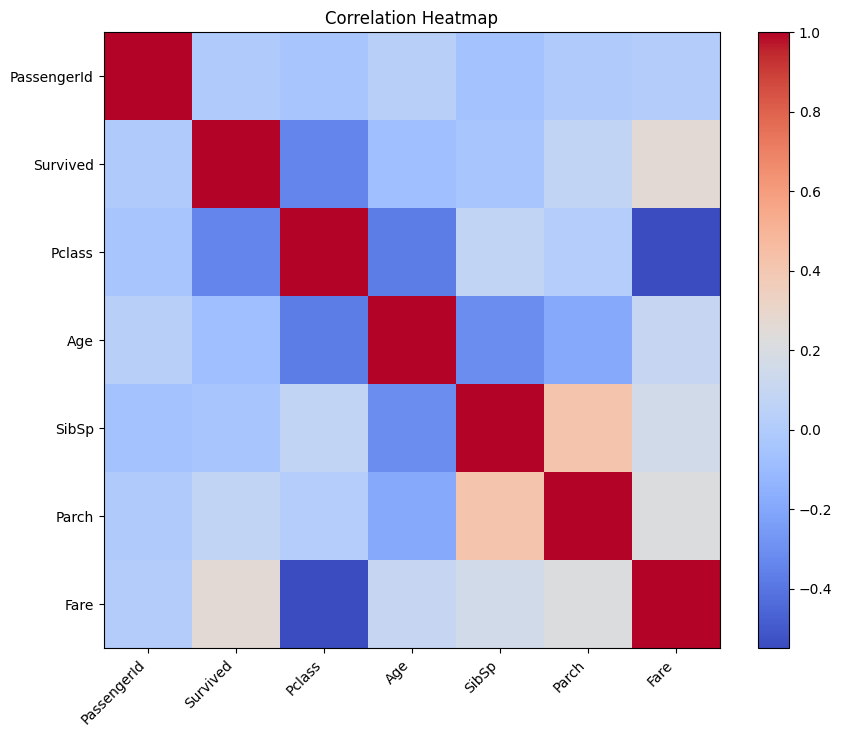


<<<<<<< Code >>>>>>


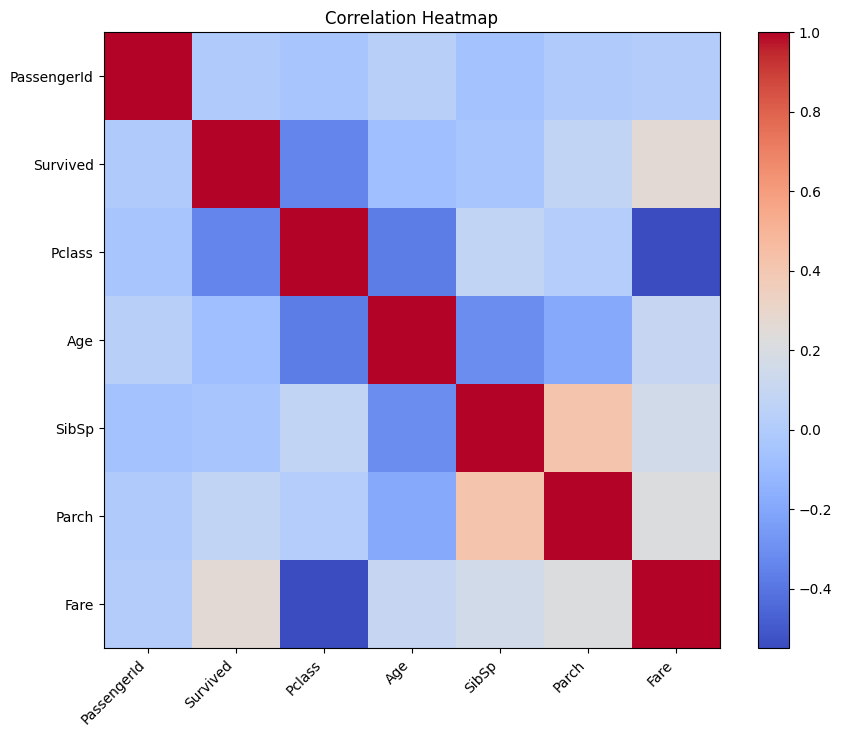

<<<<<<< Message >>>>>>

<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
The correlation heatmap has been successfully generated using `matplotlib`. The heatmap visualizes the correlation matrix of the numeric columns in the dataset.
<<<<<<< 최종 답변 >>>>>>


In [17]:
# 질의에 대한 답변을 출력합니다.
response = agent.stream({"input": "corr() 을 구해서 히트맵 시각화"})

for step in response:
    stream_parser.process_agent_steps(step)

In [18]:
ask("몇 개의 행이 있어?")

<<<<<<< Code >>>>>>
len(df)
891
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
891
<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
데이터프레임에는 총 891개의 행이 있습니다.
<<<<<<< 최종 답변 >>>>>>


<<<<<<< Code >>>>>>
# Calculate survival rate for male and female passengers
gender_survival_rate = df.groupby('Sex')['Survived'].mean()
gender_survival_rate
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
<<<<<<< Code >>>>>>
<<<<<<< Code >>>>>>
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and palette for the plot
sns.set(style='white', palette='muted')
ModuleNotFoundError: No module named 'seaborn'
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
<<<<<<< Message >>>>>>
<<<<<<< Message >>>>>>
ModuleNotFoundError: No module named 'seaborn'
<<<<<<< Message >>>>>>


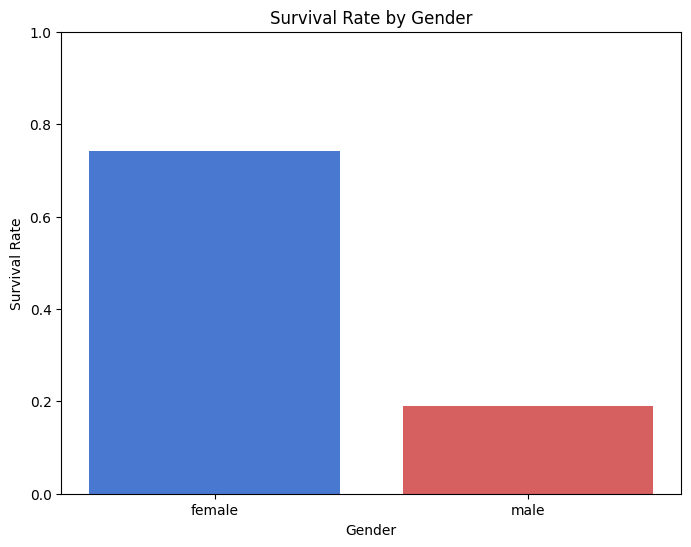

<<<<<<< Code >>>>>>
import matplotlib.pyplot as plt

# Plotting the survival rate for male and female passengers using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(gender_survival_rate.index, gender_survival_rate.values, color=['#4878CF', '#D65F5F'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

<<<<<<< Code >>>>>>


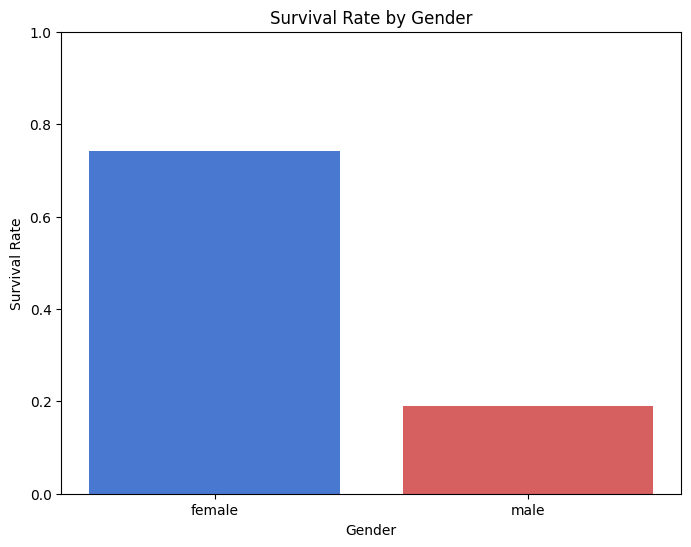

<<<<<<< Message >>>>>>

<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
남자 승객과 여자 승객의 생존율을 계산한 결과, 여자는 약 74.2%, 남자는 약 18.9%의 생존율을 보였습니다. 위의 바 차트는 이를 시각화한 것입니다.
<<<<<<< 최종 답변 >>>>>>


In [19]:
ask("남자 승객과 여자 승객의 생존율을 구한뒤 barplot 차트로 시각화 해줘")

<<<<<<< Code >>>>>>
# Filter the DataFrame for passengers in Pclass 1 or 2 and Age <= 10
filtered_df = df[(df['Pclass'].isin([1, 2])) & (df['Age'] <= 10)]

# Calculate survival rate by Sex
survival_rate_by_sex = filtered_df.groupby('Sex')['Survived'].mean()
survival_rate_by_sex
Sex
female    0.888889
male      1.000000
Name: Survived, dtype: float64
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
Sex
female    0.888889
male      1.000000
Name: Survived, dtype: float64
<<<<<<< Message >>>>>>
<<<<<<< Code >>>>>>
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and palette
sns.set(style="white", palette="muted")

# Create a bar plot for survival rate by sex
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_sex.index, y=survival_rate_by_sex.values)
plt.title('Survival Rate of Children (Age <= 10) in Pclass 1 & 2 by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()
ModuleNotFoundError: No module named 'seaborn'
<<<<<<< Code >>>>>>
<<<<<<<

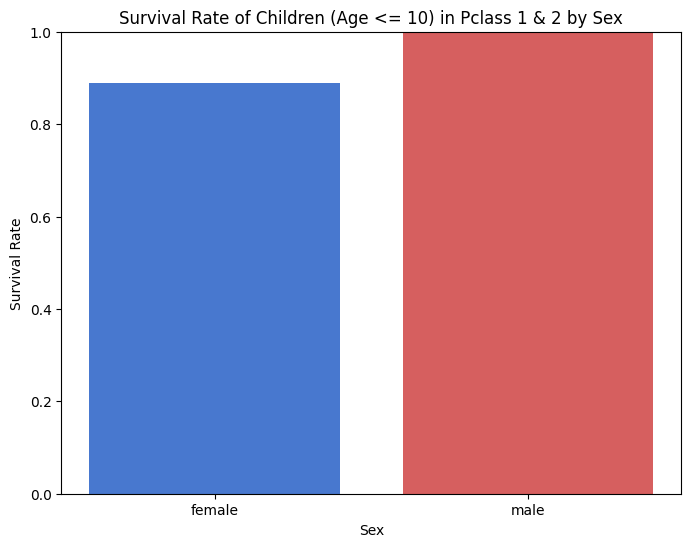

<<<<<<< Code >>>>>>
import matplotlib.pyplot as plt

# Create a bar plot using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(survival_rate_by_sex.index, survival_rate_by_sex.values, color=['#4878CF', '#D65F5F'])
plt.title('Survival Rate of Children (Age <= 10) in Pclass 1 & 2 by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

<<<<<<< Code >>>>>>


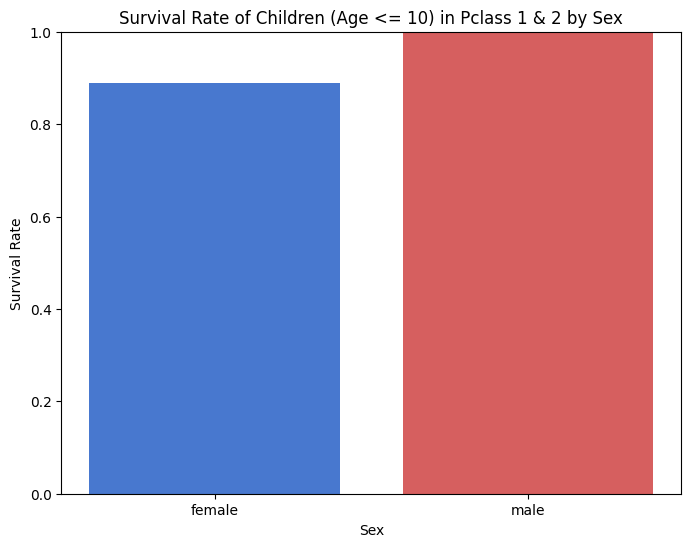

<<<<<<< Message >>>>>>

<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
1, 2등급에 탑승한 10세 이하 어린 아이의 성별별 생존율은 다음과 같습니다:
- 여성: 88.89%
- 남성: 100.00%

위 결과를 시각화한 그래프는 다음과 같습니다. (시각화는 matplotlib를 사용하였습니다.)
<<<<<<< 최종 답변 >>>>>>


In [20]:
ask("1,2 등급에 탑승한 10세 이하 어린 아이의 성별별 생존율을 구하고 시각화 하세요")